# Imports

In [82]:
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
import eval_CT_helper as help

# Recreate dirs

In [83]:
!rm -rf /home/andrew/ITRI-LungCancer/sample_out
!mkdir -p /home/andrew/ITRI-LungCancer/sample_out

# Load arrays with annotations and filepaths

In [84]:
path = '/home/andrew/ITRI-LungCancer/sample/'
imgs = os.listdir(path)
imgs.sort()

image_paths = []
labels = []
for i, img in enumerate(imgs):
    # Info for next block
    patient_id = img.split('_')[0]
    slice_location = float(img.split('_')[-1].split('.')[0])
    
    # Get annotations then bboxes
    ann = help.get_ann_from_slice(patient_id, slice_location)
    label = help.ann_to_bbox(ann)
    labels.append(label)
    
    # Save image paths for later
    image_paths.append(path+img)

# Run model and store annotations

In [85]:
outpath = '/home/andrew/ITRI-LungCancer/sample_out/'
model = YOLO('/home/andrew/ITRI-LungCancer/YOLO/model_classify_rgb.pt')
preds = []

# Run model on images and save bounding boxes
for i, (path, ann) in enumerate(zip(image_paths, labels)):
    result = model(path, verbose=False, conf=0.3, iou=0.0, augment=True)[0]
    preds.append(help.getBoundingBox(result))

# Zip up predictions with labels

In [86]:
combined = []
for i, (pred, label) in enumerate(zip(preds, labels)):
    # Remove slices that don't have enough contiguous slices
    if help.get_num_relevant_slices(i, preds) < 4:
        pred = []
    if help.get_num_relevant_slices(i, labels) < 4:
        label = []
        
    # Ignore null entries
    if pred == [] and label == []:
        continue
    combined.append((i, pred, label))

/tmp/ipykernel_63850/4149888660.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


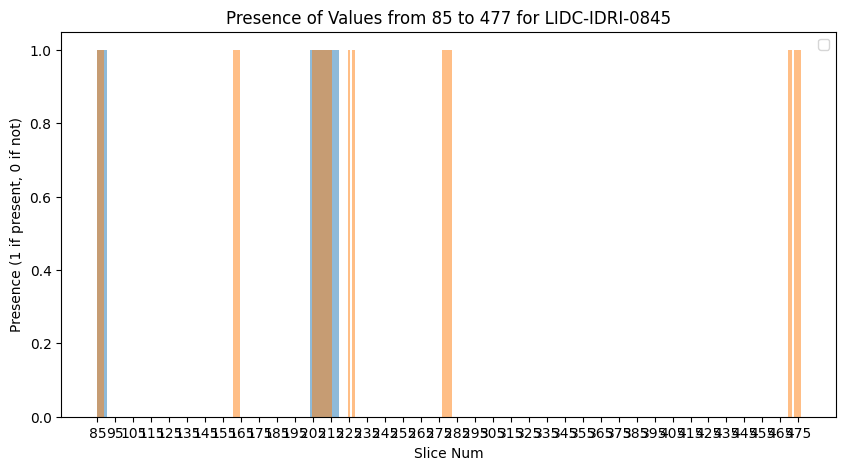

In [87]:
# Determines max y value to show on graph
y_min = combined[0][0]
y_max = combined[-1][0]

# Create an array of zeros for the range 0-200
label_presence = [0] * (y_max-y_min)
pred_presence = [0] * (y_max-y_min)

# Mark presence of each value in the list
for entry in combined:
    if entry[1] != []:
        pred_presence[entry[0]-y_max] = 1
    if entry[2] != []:
        label_presence[entry[0]-y_max] = 1

# Plot
plt.figure(figsize=(10, 5))
plt.bar(range(y_min, y_max), label_presence, width=1.0, alpha=.5)
plt.bar(range(y_min, y_max), pred_presence, width=1.0, alpha=.5)
plt.xlabel('Slice Num')
plt.ylabel('Presence (1 if present, 0 if not)')
patient_id = path.split('_')[0].split('/')[-1]
plt.title(f'Presence of Values from {y_min} to {y_max} for {patient_id}')
plt.xticks(range(y_min, y_max, 10))
plt.legend()
plt.show()

In [88]:
combined

[(85, [[132, 379, 6, 6], [298, 177, 10, 9]], [[293, 173, 10, 9]]),
 (86, [[298, 177, 10, 9], [232, 321, 15, 12]], [[293, 173, 10, 9]]),
 (87, [[298, 177, 11, 10]], [[293, 173, 10, 9]]),
 (88, [[298, 177, 11, 11], [386, 375, 9, 9]], [[293, 173, 10, 9]]),
 (89, [], [[293, 173, 10, 9]]),
 (90, [], [[293, 173, 10, 9]]),
 (161, [[104, 166, 32, 42]], []),
 (162, [[103, 167, 33, 42]], []),
 (163, [[104, 166, 35, 43]], []),
 (164, [[102, 165, 32, 43]], []),
 (204, [], [[109, 145, 16, 14]]),
 (205, [[117, 153, 11, 12]], [[109, 145, 15, 13]]),
 (206, [[117, 153, 12, 12]], [[109, 145, 15, 13]]),
 (207, [[117, 153, 13, 13]], [[110, 146, 15, 13]]),
 (208, [[117, 152, 15, 15]], [[110, 146, 15, 13]]),
 (209, [[117, 152, 15, 14], [454, 203, 8, 8]], [[110, 146, 15, 13]]),
 (210, [[117, 152, 16, 14]], [[110, 146, 15, 13]]),
 (211, [[117, 152, 16, 14]], [[110, 146, 15, 13]]),
 (212, [[117, 152, 16, 13], [153, 122, 10, 9]], [[110, 146, 15, 13]]),
 (213, [[117, 152, 15, 13]], [[110, 146, 15, 13]]),
 (214, 